## Similarity & Dissimilarity experiment
------------
### 1. (Not accepted) RMSE between outputs and inputs over all rotations
### 2. (Alternate) RMSE between all outputs

In [1]:
%matplotlib inline
import os
import gc
import sys
import glob
import math
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.examples.tutorials.mnist import input_data
from IPython.display import Image, display_png
# dataset pipeline in train
from train_debug import input_fn, make_copy_rotate_image
from train_debug import rotate_operation # rotate one angle
from train_debug import rotate_fn # rotate random angle

In [2]:
def load_model(model_dir, epoch, mtype):
    print(" Load {} at {} epoch".format(mtype, epoch))
    model_def = model_dir+'/'+mtype+'.json'
    model_weight = model_dir+'/'+mtype+'-'+str(epoch)+'.h5'
    with open(model_def, "r") as f:
        model = tf.keras.models.model_from_json(f.read())
    model.load_weights(model_weight)
    return model

In [3]:
def resize_fn(img, height=32, width=32):
    return tf.image.resize_images(img, (height, width))

In [6]:
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=False)

Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# data
x_test = mnist.test.images
x_test = x_test.reshape(-1, 28,28,1)
# labels
y_test = mnist.test.labels

# resize
imgs_tf = resize_fn(x_test, height=32, width=32)
# tf2np
test_imgs = tf.keras.backend.eval(imgs_tf)

#### 62628198

In [4]:
expname = '62628198'
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=19, mtype='encoder')
decoder = load_model(model_dir, epoch=19, mtype='decoder')

 Load encoder at 19 epoch
 Load decoder at 19 epoch


In [38]:
# get images
digit_imgs = []
for digit in range(10):
    ddx = np.where(y_test == digit)
    n = np.random.randint(0,len(ddx[0]),1)
    nn = np.array(ddx)[0][n]
    digit_imgs.append(test_imgs[nn])

#### Check original images

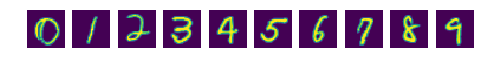

In [39]:
fig = plt.figure(figsize=(8,6))
for digit in range(10):
    ax = plt.subplot(1,10,digit+1)
    plt.imshow(digit_imgs[digit].reshape(32,32))
    plt.axis('off')
plt.show()

#### check reconst images with model

In [40]:
dimgs = np.concatenate(digit_imgs, axis=0)

In [41]:
dimgs.shape

(10, 32, 32, 1)

In [42]:
encs = encoder.predict(dimgs)
decoded_imgs= decoder.predict(encs)
decoded_imgs.shape

(10, 32, 32, 1)

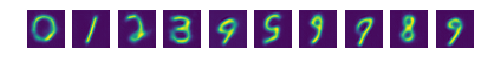

In [43]:
fig = plt.figure(figsize=(8,6))
for digit in range(10):
    ax = plt.subplot(1,10,digit+1)
    plt.imshow(decoded_imgs[digit].reshape(32,32))
    plt.axis('off')
plt.show()

#### Check original and output (rotation-agnostic + bottleneck)

#### exp.2

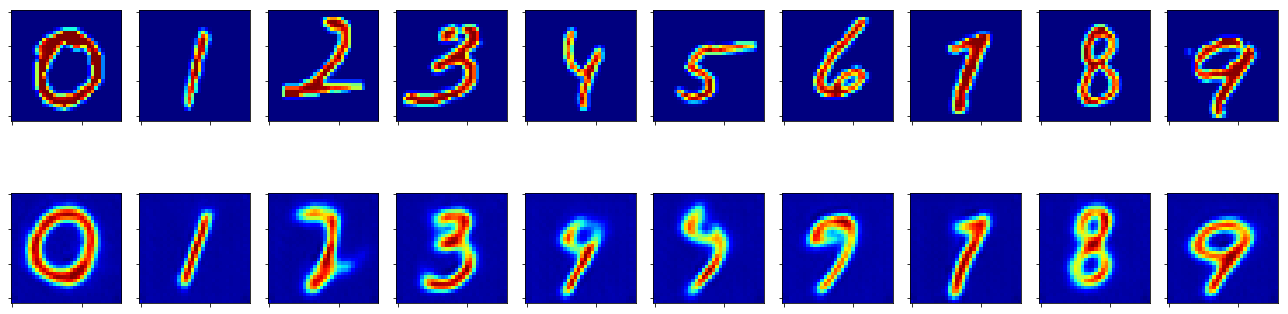

In [13]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(digit_imgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

#### exp.1

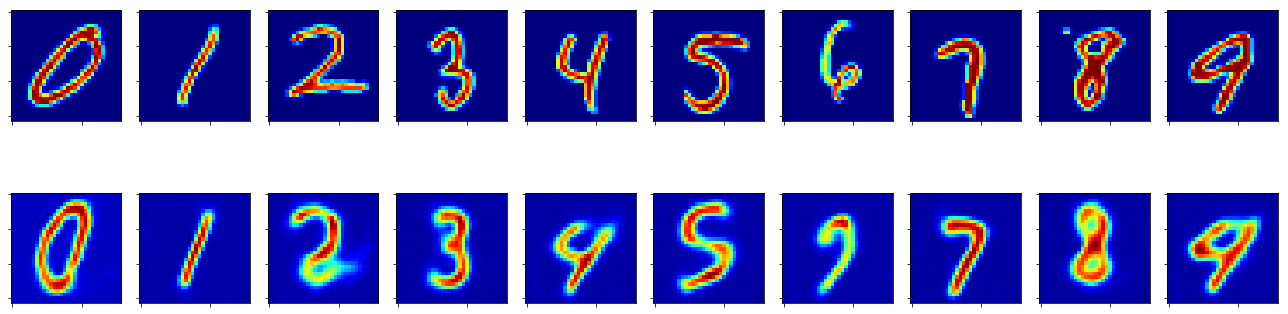

In [57]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(digit_imgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

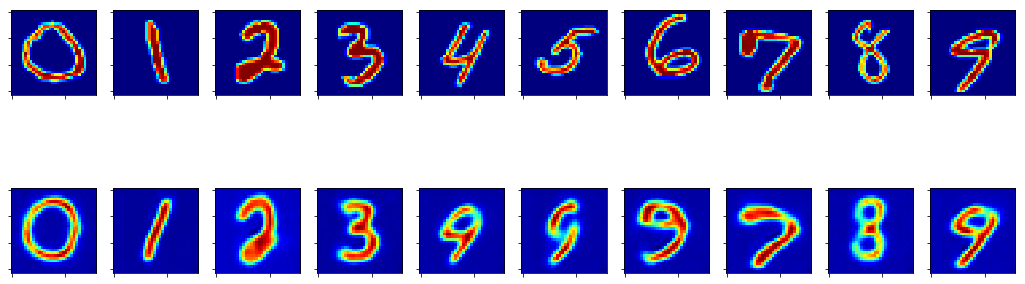

In [104]:
ig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(digit_imgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

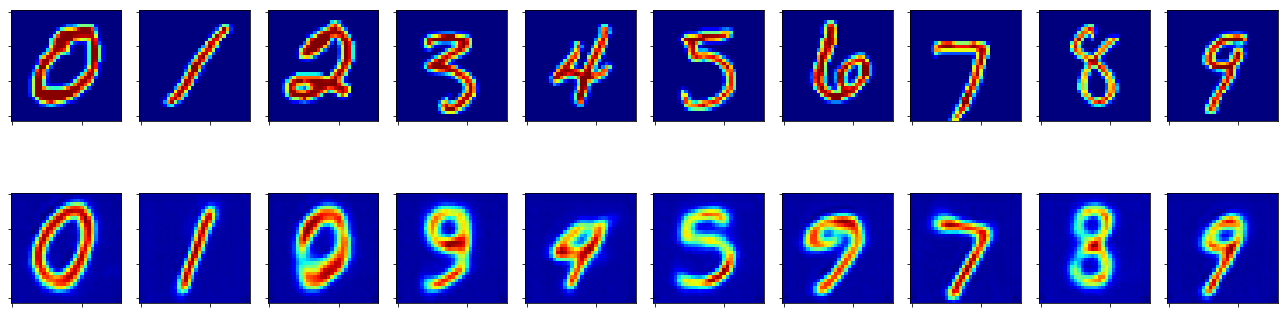

In [131]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(digit_imgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

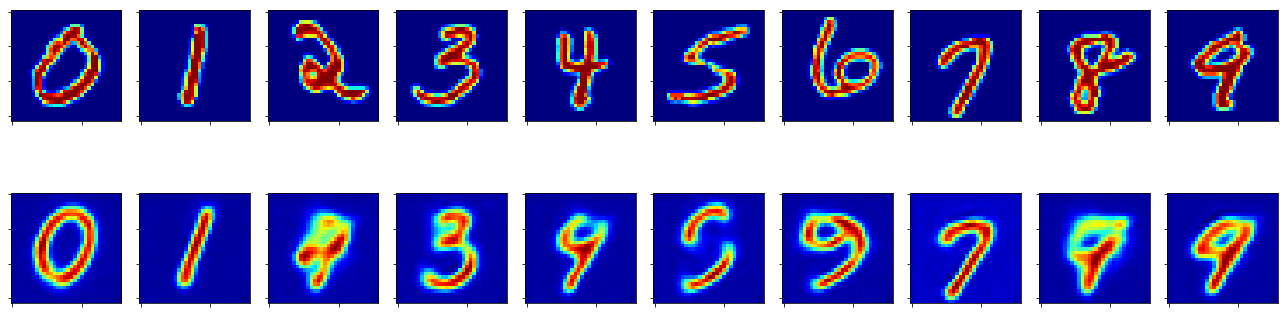

In [20]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(digit_imgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

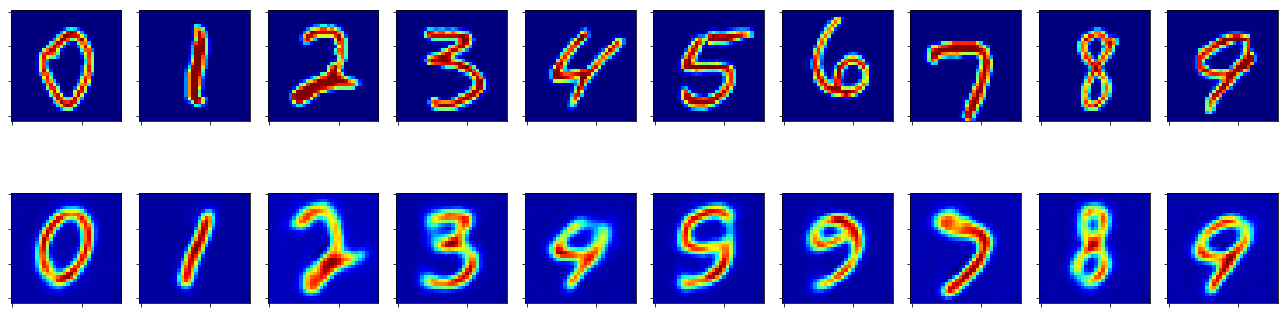

In [53]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(digit_imgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

Rotate 90 degree

In [55]:
dimg = np.asarray(digit_imgs)

In [63]:
rdigit_imgs_tf = rotate_operation(dimgs, 300*math.pi/180)

In [64]:
rimgs = tf.keras.backend.eval(rdigit_imgs_tf)

300 degree

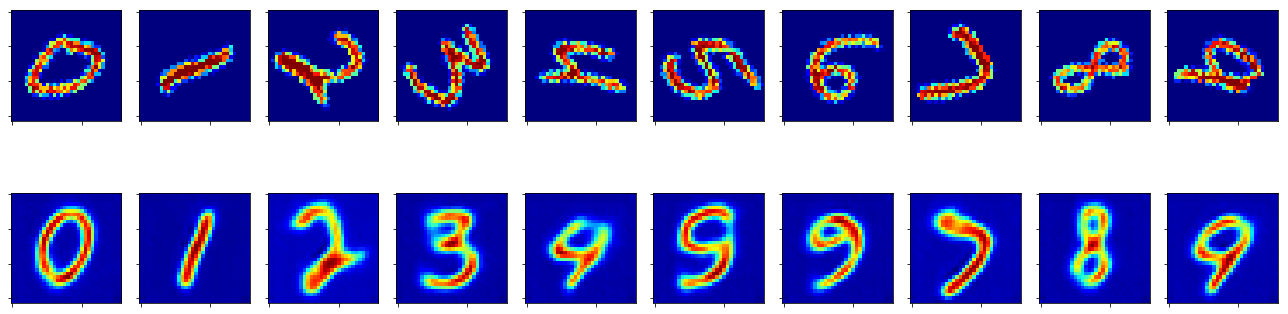

In [65]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(rimgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

60 degree

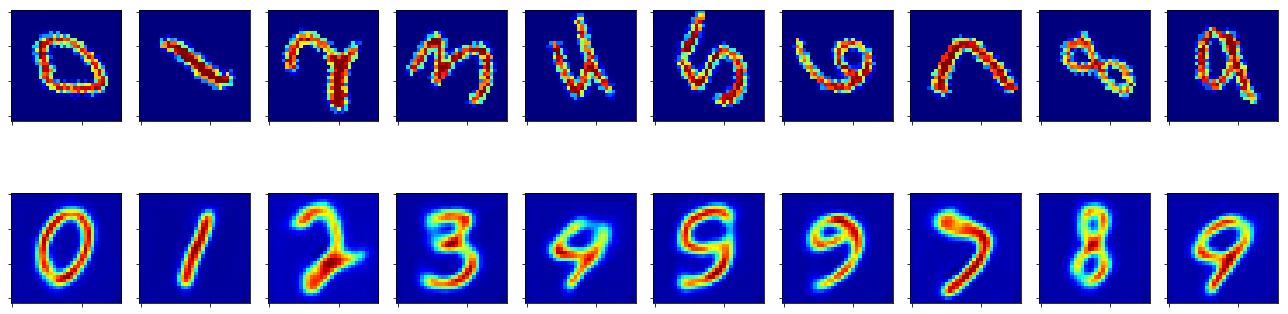

In [62]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(rimgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

90 degree

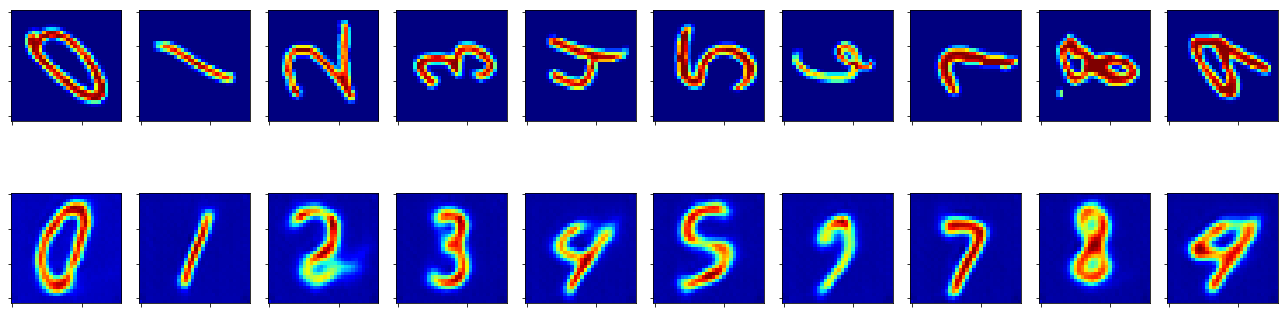

In [58]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(rimgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

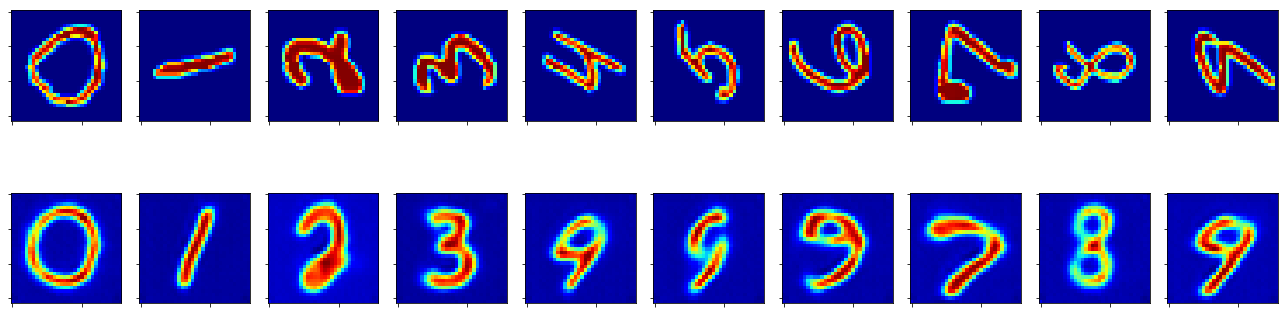

In [108]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(rimgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

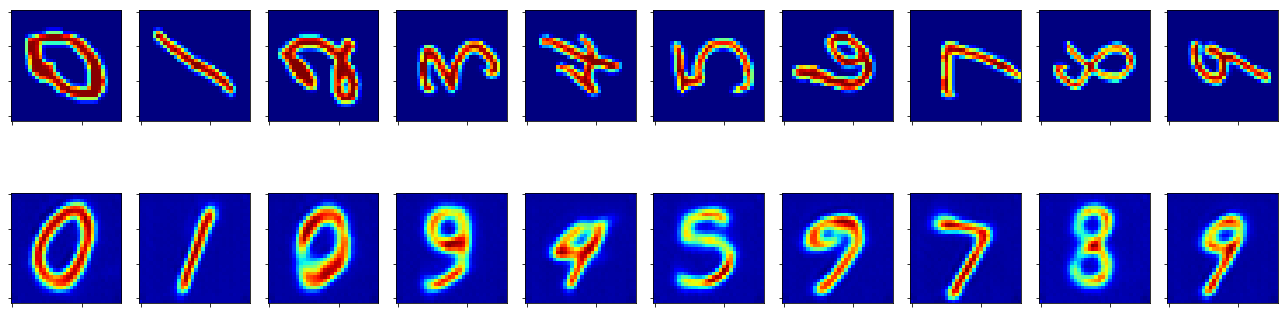

In [135]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(rimgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

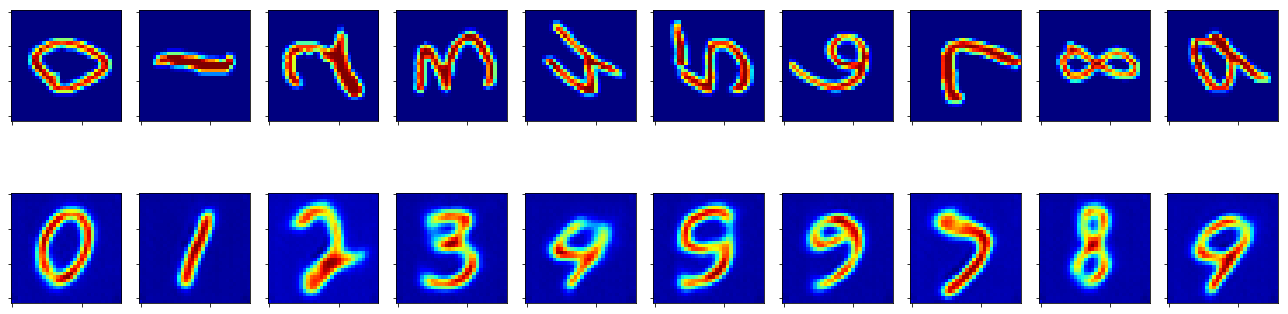

In [59]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(rimgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

-----------------
## RMSE

#### EXP.2 
- Case 1: Might be little bit bluer and not clear example (MEMO; 10/17-18)

In [73]:
def rmse_fn(x,y):
    """errors in iteration when native array. probably no conmma
    """
    res = np.asarray((x-y).ravel())
    _rmse = 0.00
    idx = 0
    for j in res:
        _rmse += j**2
        idx += 1
    rmse = np.sqrt(_rmse/float(idx))
    return rmse

In [74]:
def compute_MaxL2(rimgs, encoder, decoder, degree=1):
    """
    rimgs [359, 32,32,1]
    """
    encoded_imgs = encoder.predict(rimgs)
    decoded_rimgs = decoder.predict(encoded_imgs)
    max_rmse_list = []
    for angle in range(0,360,degree):
        x = decoded_rimgs[angle]
        rmse_list = []
        for i in range(0,360,degree):
            if angle != i:
                rmse_list.append(rmse_fn(x,decoded_rimgs[i]))
        max_rmse = np.max(rmse_list)
        max_rmse_list.append(max_rmse)
    return np.asarray(max_rmse_list)

In [75]:
def compute_TableL2(rimgs, encoder, decoder, degree=1):
    """
    rimgs [359, 32,32,1]
    rmse_table [360,360]
    """
    encoded_imgs = encoder.predict(rimgs)
    decoded_rimgs = decoder.predict(encoded_imgs)
    n = len([i for i in range(0,360, degree)])
    rmse_table = np.zeros((n,n)).astype(np.float64)
    for (iangle, jangle) in itertools.combinations(range(0,360,degree),2):
        if iangle != jangle:
            rmse_table[iangle, jangle] = rmse_fn(decoded_rimgs[iangle],decoded_rimgs[jangle])
    return rmse_table

In [26]:
max_rmse_lists = []
for digit in range(10):
    rimgs_list = []
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    print(rimgs.shape)
    max_rmse_lists.append(compute_MaxL2(rimgs, encoder, decoder))
    print(" NORMAL END:  Digit {} ".format(digit))

(360, 32, 32, 1)
 NORMAL END:  Digit 0 
(360, 32, 32, 1)
 NORMAL END:  Digit 1 
(360, 32, 32, 1)
 NORMAL END:  Digit 2 
(360, 32, 32, 1)
 NORMAL END:  Digit 3 
(360, 32, 32, 1)
 NORMAL END:  Digit 4 
(360, 32, 32, 1)
 NORMAL END:  Digit 5 
(360, 32, 32, 1)
 NORMAL END:  Digit 6 
(360, 32, 32, 1)
 NORMAL END:  Digit 7 
(360, 32, 32, 1)
 NORMAL END:  Digit 8 
(360, 32, 32, 1)
 NORMAL END:  Digit 9 


In [27]:
max_rmse_array = np.asarray(max_rmse_lists)

In [28]:
max_rmse_array.shape

(10, 360)

In [29]:
max_rmse_array[0].shape

(360,)

<Figure size 864x576 with 0 Axes>

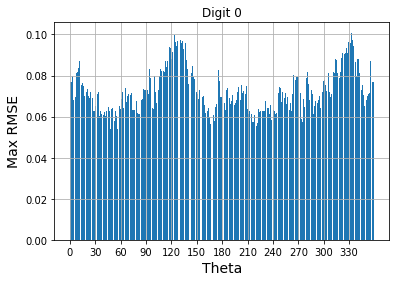

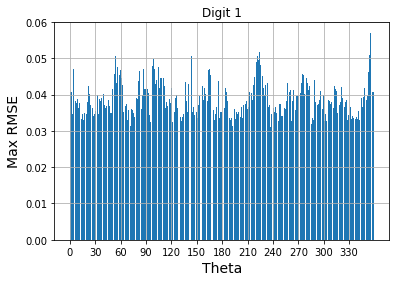

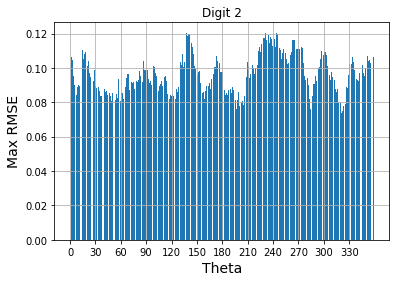

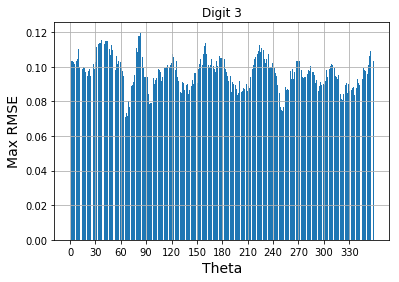

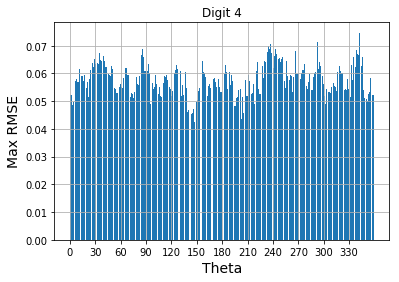

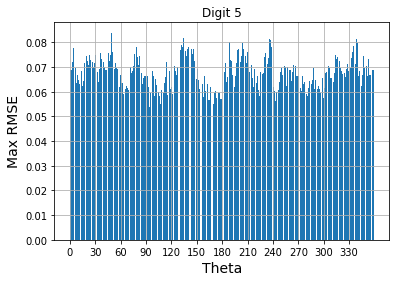

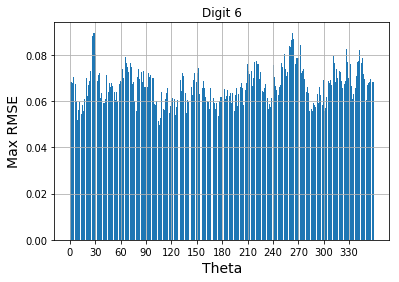

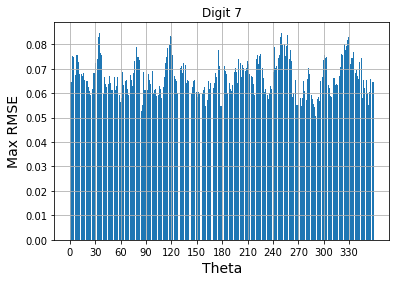

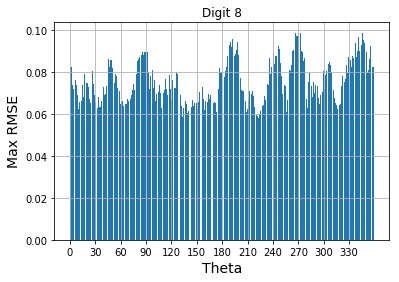

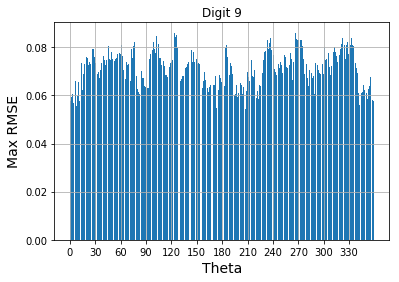

In [33]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(max_rmse_array[0].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, max_rmse_array[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
    plt.xlabel("Theta", fontsize=14)
    plt.ylabel("Max RMSE", fontsize=14)
#fig.tight_layout()
    plt.show()

In [85]:
max_rmse_array.shape

(10, 360)

##### save result & images 

In [31]:
# save 1017 test result & digits imgs
np.savez('./maxrmse__imgs_1017', max_rmse=max_rmse_array, imgs=digit_imgs)

###  Check images in  max rmse

Restore data from npz file

In [5]:
data = np.load('./maxrmse__imgs_1017.npz')

In [8]:
digit_imgs = data['imgs']

In [9]:
digit_imgs.shape

(10, 1, 32, 32, 1)

In [13]:
rmse_table_lists = []
for digit in range(10):
    rimgs_list = []
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    print(rimgs.shape)
    rmse_table_lists.append(compute_TableL2(rimgs, encoder, decoder))
    print(" NORMAL END:  Digit {} ".format(digit))

(360, 32, 32, 1)
 NORMAL END:  Digit 0 
(360, 32, 32, 1)
 NORMAL END:  Digit 1 
(360, 32, 32, 1)
 NORMAL END:  Digit 2 
(360, 32, 32, 1)
 NORMAL END:  Digit 3 
(360, 32, 32, 1)
 NORMAL END:  Digit 4 
(360, 32, 32, 1)
 NORMAL END:  Digit 5 
(360, 32, 32, 1)
 NORMAL END:  Digit 6 
(360, 32, 32, 1)
 NORMAL END:  Digit 7 
(360, 32, 32, 1)
 NORMAL END:  Digit 8 
(360, 32, 32, 1)
 NORMAL END:  Digit 9 


<Figure size 864x576 with 0 Axes>

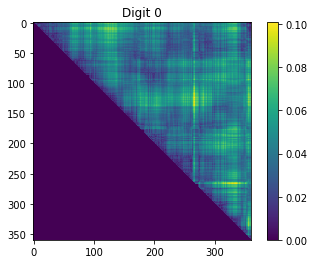

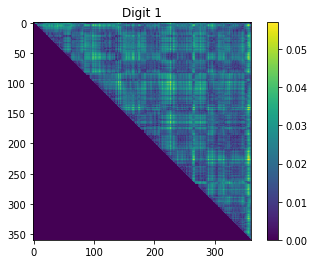

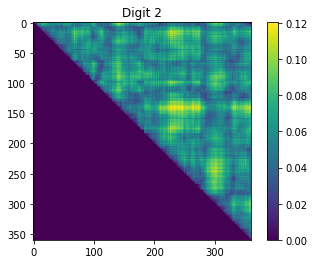

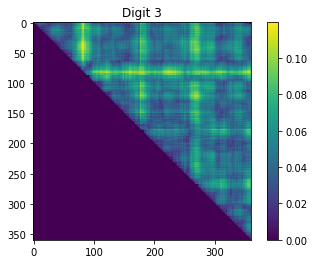

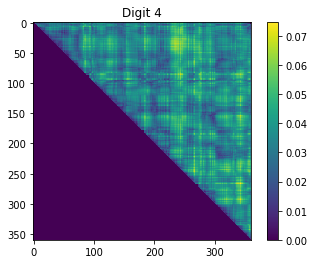

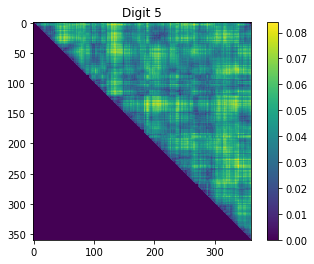

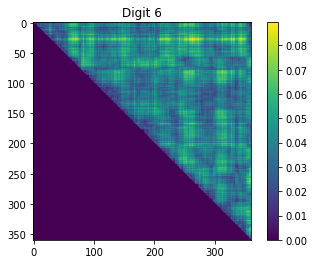

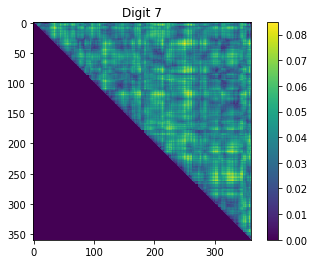

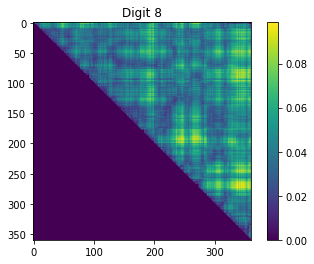

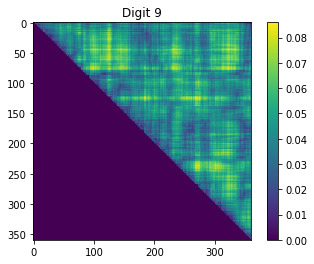

In [15]:
plt.figure(figsize=(12,8))
for idx, rmse_table in enumerate(rmse_table_lists):
    fig = plt.figure(figsize=(6,4))
    plt.imshow(rmse_table)
    plt.title("Digit {}".format(idx))
    #plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.colorbar()
    plt.show()

In [21]:
## max index in each digit-class
for idx, rmse_table in enumerate(rmse_table_lists):
    print(np.unravel_index(np.argmax(rmse_table), rmse_table.shape) )
    print("Digit {} max rmse {}".format(idx, np.max(rmse_table)) )

(266, 333)
Digit 0 max rmse 0.10084960461779992
(227, 356)
Digit 1 max rmse 0.057017795750371504
(138, 246)
Digit 2 max rmse 0.12046240239292932
(39, 83)
Digit 3 max rmse 0.11966369737710757
(266, 342)
Digit 4 max rmse 0.07471027781668156
(49, 136)
Digit 5 max rmse 0.08394551409350909
(28, 263)
Digit 6 max rmse 0.08950278731324787
(35, 250)
Digit 7 max rmse 0.0847465642401316
(194, 267)
Digit 8 max rmse 0.09869332081054898
(124, 267)
Digit 9 max rmse 0.08602757682028654


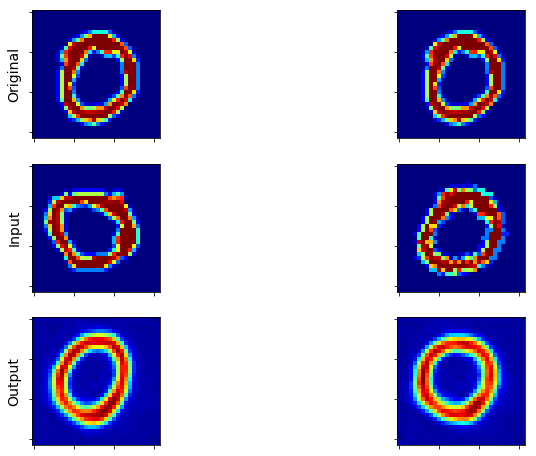

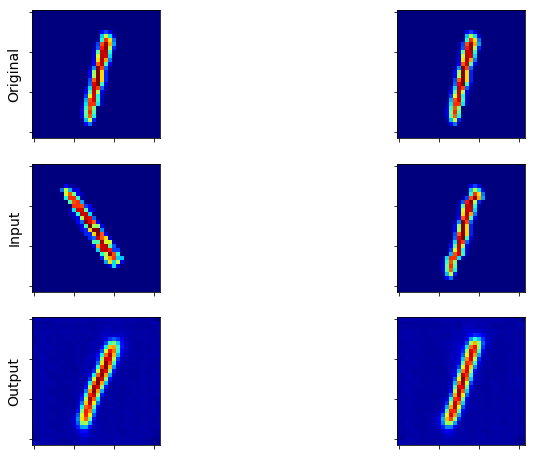

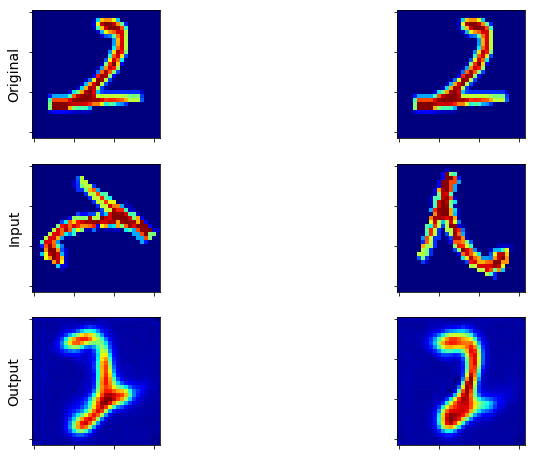

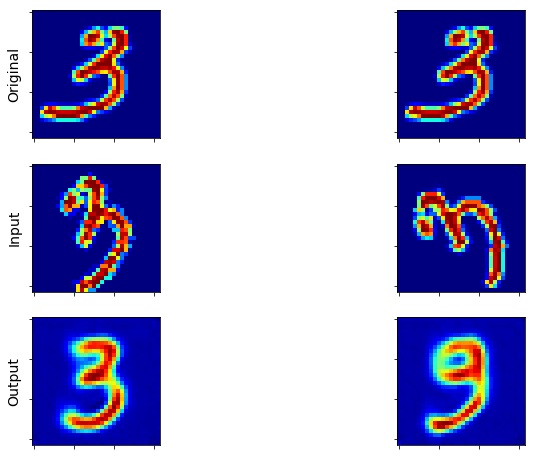

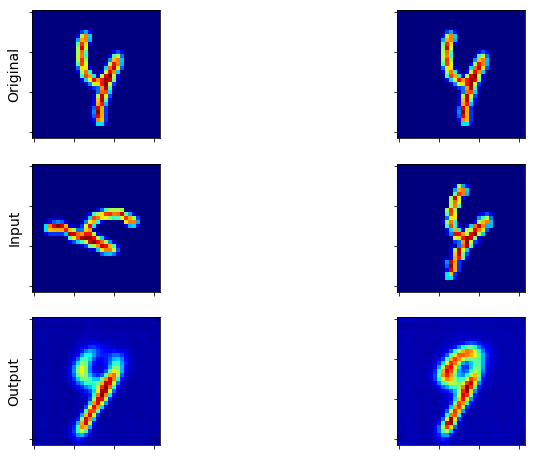

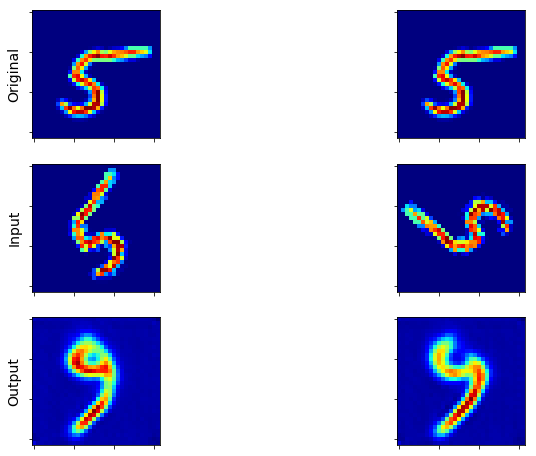

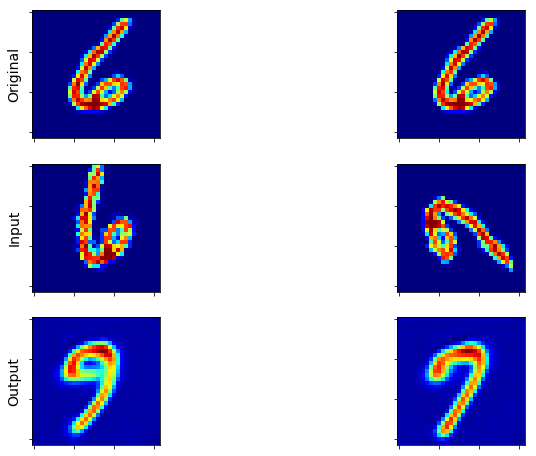

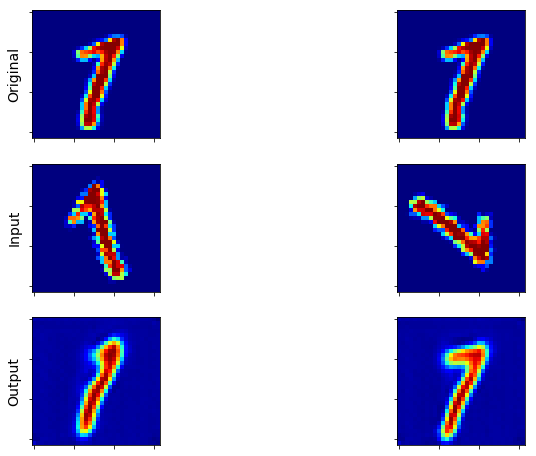

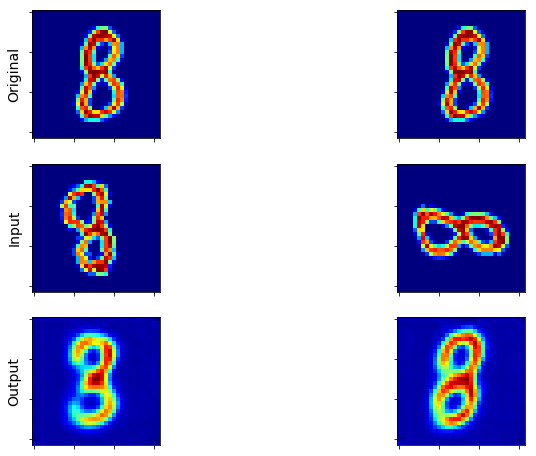

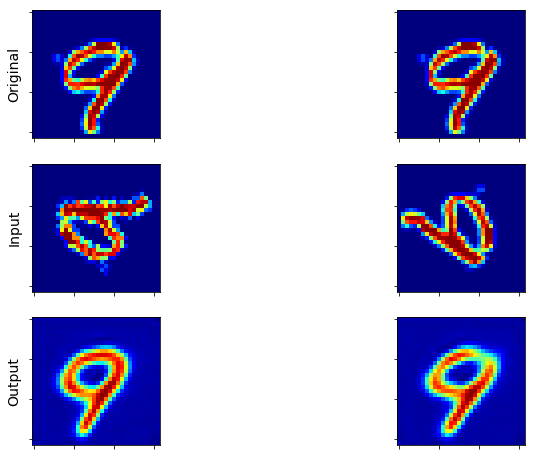

In [32]:
for digit,  rmse_table in enumerate(rmse_table_lists):
    (idx, jdx) = np.unravel_index(np.argmax(rmse_table), rmse_table.shape)
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    rimgs_list = []
    for i in [idx, jdx]:
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    #print(rimgs.shape)
    encoded_imgs = encoder.predict(rimgs)
    decoded_imgs = decoder.predict(encoded_imgs)
    n = decoded_imgs.shape[0]
    fig, ax = plt.subplots(3,n, figsize=(12,8))
    for j in range(n):
        ax[0][j].imshow(digit_imgs[digit].reshape(32,32), cmap='jet')
        ax[1][j].imshow(rimgs[j].reshape(32,32), cmap='jet')
        ax[2][j].imshow(decoded_imgs[j].reshape(32,32), cmap='jet')
        for k in range(3):
            ax[k][j].set_xticklabels([])
            ax[k][j].set_yticklabels([])
        if j == 0:
            ax[0][j].set_ylabel("Original", fontsize=14)
            ax[1][j].set_ylabel("Input", fontsize=14)
            ax[2][j].set_ylabel("Output", fontsize=14)
    plt.show()    
    plt.close()

--------------------------------
#### EXP.1

In [15]:
def rmse_fn_exp1(rimgs, encoder, decoder):
    encoded_imgs = encoder.predict(rimgs)
    decoded_imgs = decoder.predict(encoded_imgs)
    print(decoded_imgs.shape)
    rmses = []
    #x=decoded_imgs[0]
    for i in range(359):
        """errors in iteration when native array. probably no conmma
        """
        x = rimgs[i]
        y = decoded_imgs[i]
        res = np.asarray((x-y).ravel())
        _rmse = 0.00
        idx = 0
        for j in res:
            _rmse += j**2
            idx += 1
        rmses.append(np.sqrt(_rmse/float(idx)) )
    return np.asarray(rmses)

In [109]:
rmse_list = []
for digit in range(10):
    rimgs_list = []
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    print(rimgs.shape)
    rmse_list.append(rmse_fn(rimgs, encoder, decoder))

(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)


1st

<Figure size 864x576 with 0 Axes>

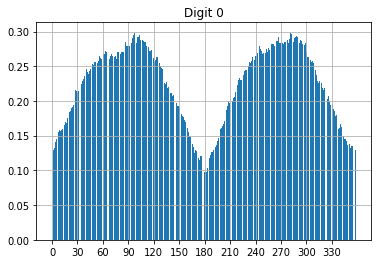

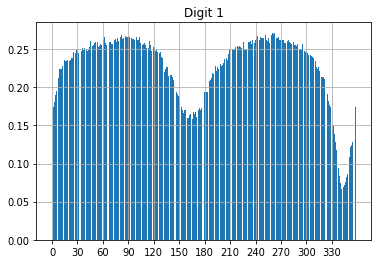

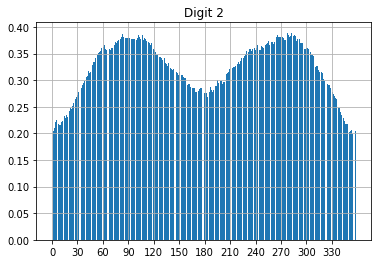

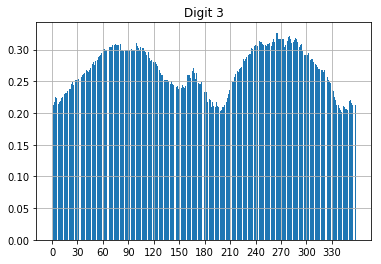

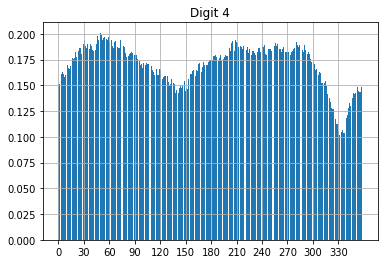

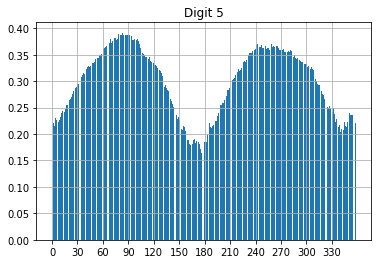

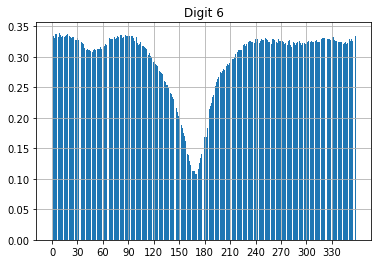

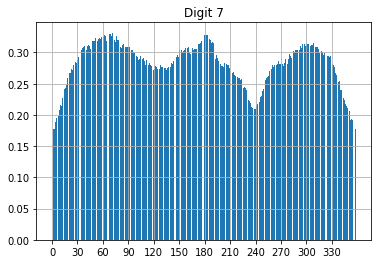

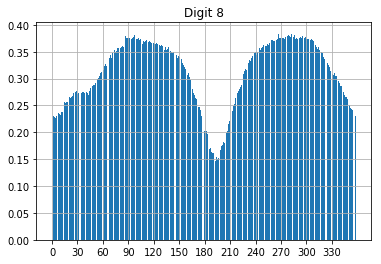

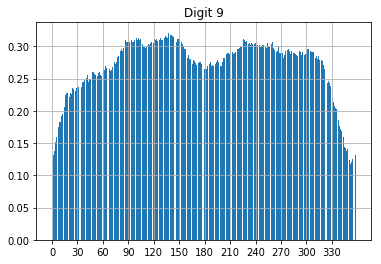

In [17]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(rmse_list[0].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, rmse_list[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
#fig.tight_layout()
    plt.show()

<Figure size 864x576 with 0 Axes>

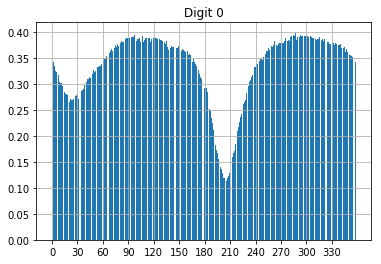

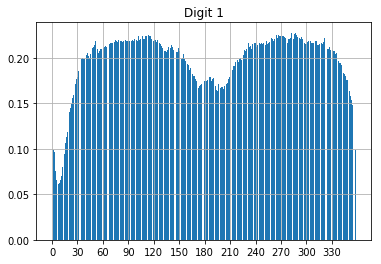

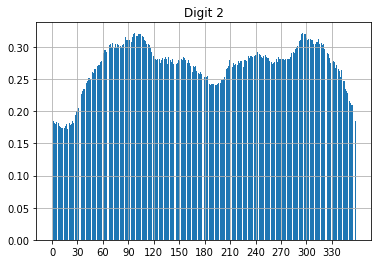

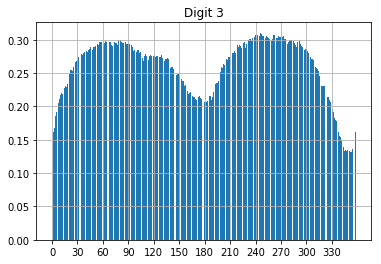

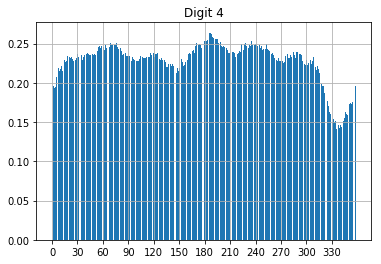

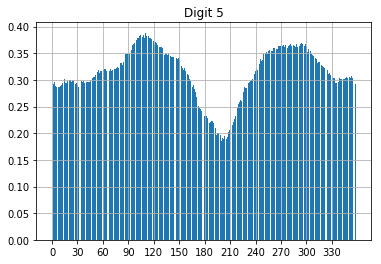

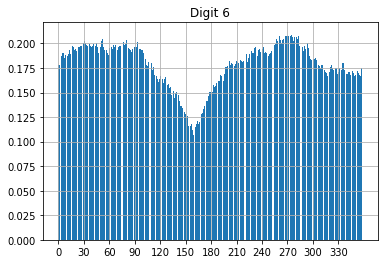

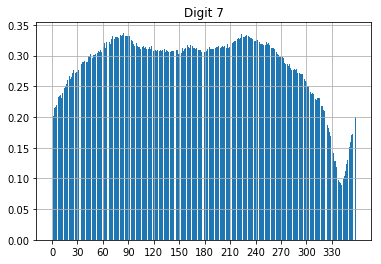

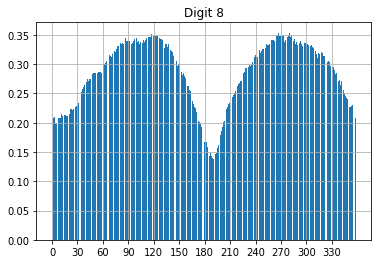

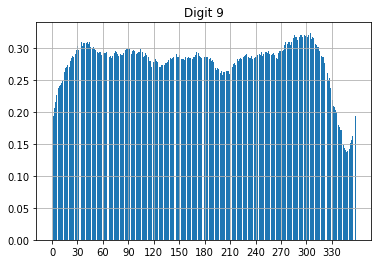

In [61]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(rmse_list[0].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, rmse_list[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
#fig.tight_layout()
    plt.show()

<Figure size 864x576 with 0 Axes>

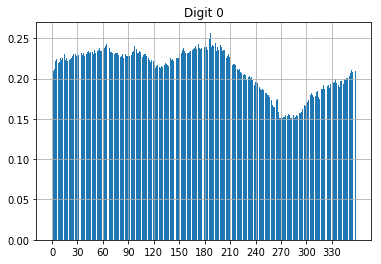

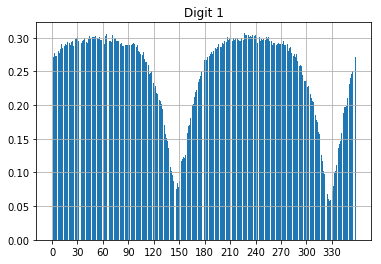

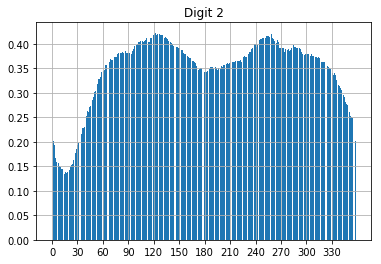

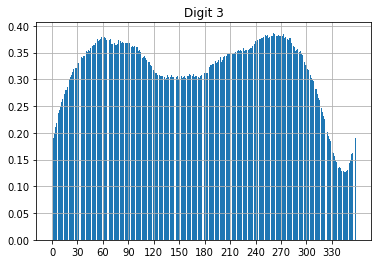

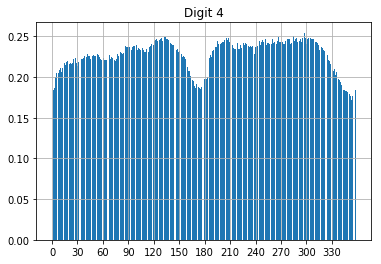

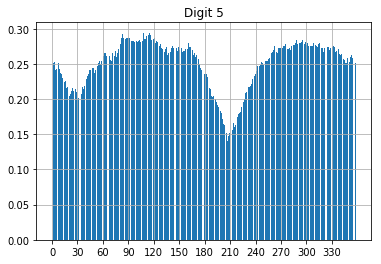

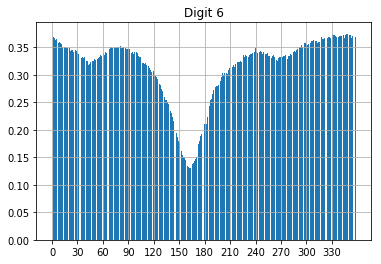

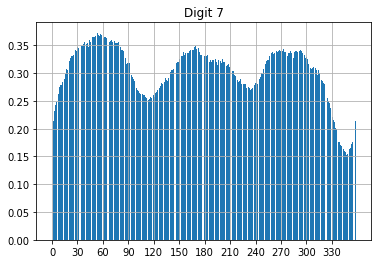

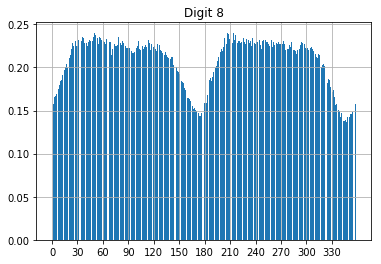

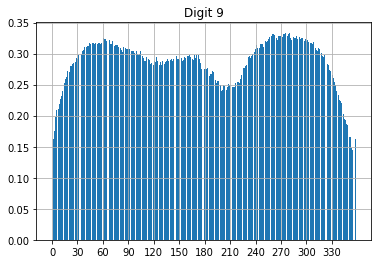

In [110]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(rmse_list[0].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, rmse_list[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
#fig.tight_layout()
    plt.show()

10/14 for Ian's request

<Figure size 864x576 with 0 Axes>

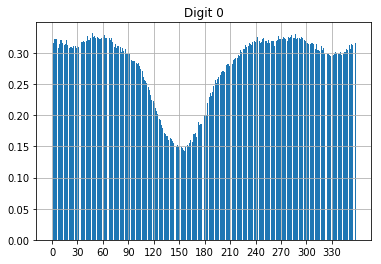

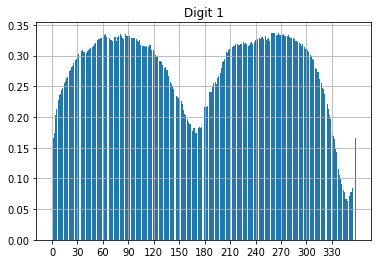

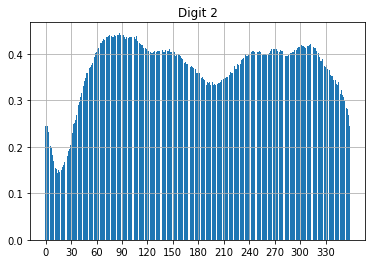

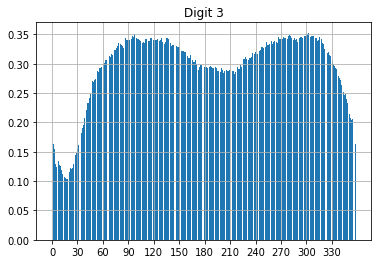

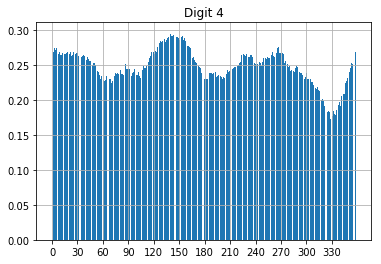

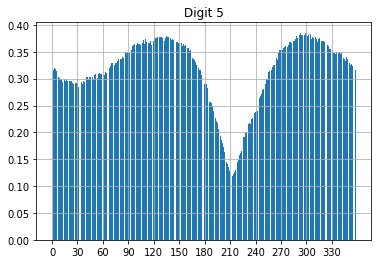

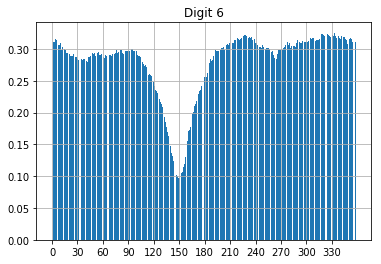

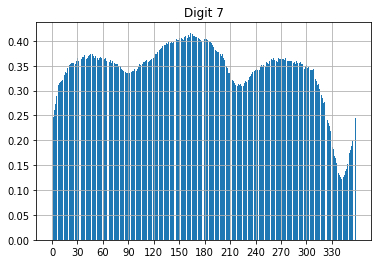

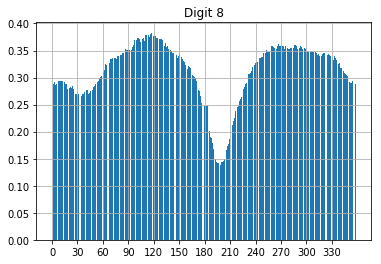

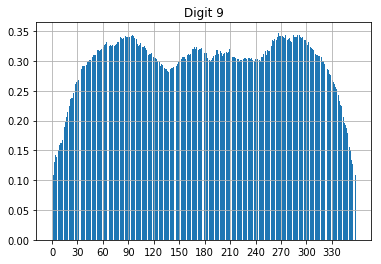

In [54]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(rmse_list[0].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, rmse_list[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
#fig.tight_layout()
    plt.show()

Image corresponds the distribution above 

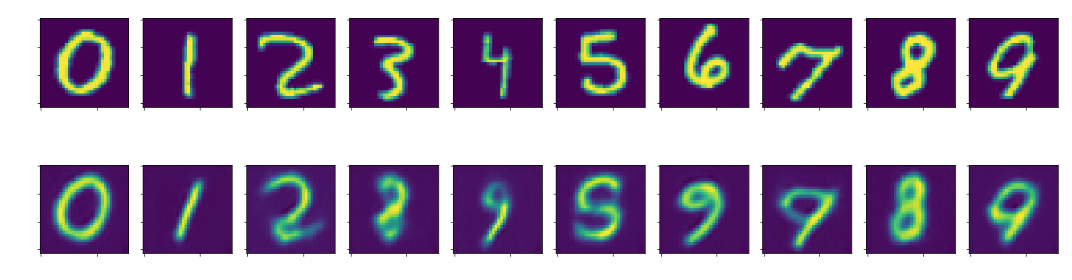

In [2]:
display_png(Image('./fig/image_reconst_loss.PNG'))

----------------------
## MODEL 62540480
### RMSE

In [8]:
expname = '62540480'
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=24, mtype='encoder')
decoder = load_model(model_dir, epoch=24, mtype='decoder')

 Load encoder at 24 epoch
 Load decoder at 24 epoch


In [68]:
# get images
digit_imgs = []
for digit in range(10):
    ddx = np.where(y_test == digit)
    n = np.random.randint(0,len(ddx[0]),1)
    nn = np.array(ddx)[0][n]
    digit_imgs.append(test_imgs[nn])

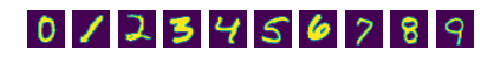

In [69]:
fig = plt.figure(figsize=(8,6))
for digit in range(10):
    ax = plt.subplot(1,10,digit+1)
    plt.imshow(digit_imgs[digit].reshape(32,32))
    plt.axis('off')
plt.show()

In [70]:
dimgs = np.concatenate(digit_imgs, axis=0)

In [71]:
encs = encoder.predict(dimgs)
decoded_imgs= decoder.predict(encs)
decoded_imgs.shape

(10, 32, 32, 1)

Rotate 0 degree

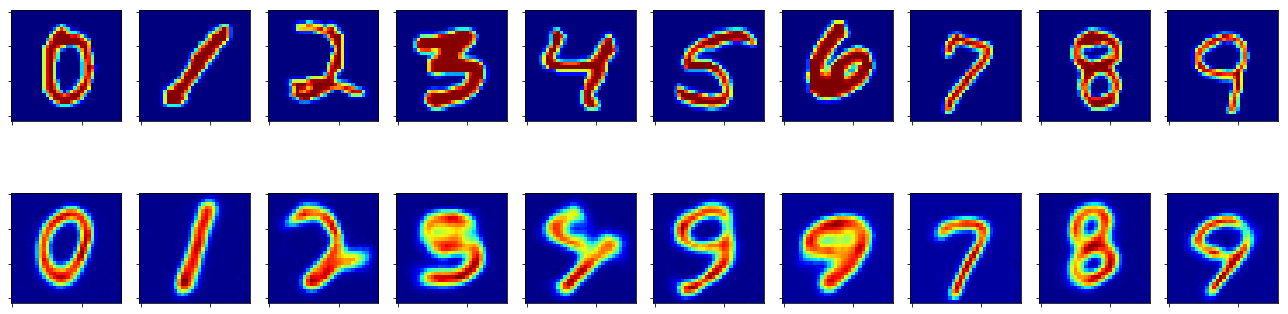

In [72]:
fig , ax = plt.subplots(2,10, figsize=(18,6))
for digit in range(10):
    ax[0][digit].imshow(digit_imgs[digit].reshape(32,32),cmap='jet')
    ax[1][digit].imshow(decoded_imgs[digit].reshape(32,32),cmap='jet')
    for j in range(2):
        ax[j][digit].set_xticklabels([])
        ax[j][digit].set_yticklabels([])
fig.tight_layout()
plt.show()

-------------
#### EXP2

In [7]:
import time

In [76]:
stime = time.time()
max_rmse_lists = []
for digit in range(10):
    rimgs_list = []
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    print(rimgs.shape)
    max_rmse_lists.append(compute_MaxL2(rimgs, encoder, decoder))
    print(" NORMAL END:  Digit {} ".format(digit))
etime = time.time()-stime
print(" Erapse time [min] | {}".format(etime/float(60)))

(360, 32, 32, 1)
 NORMAL END:  Digit 0 
(360, 32, 32, 1)
 NORMAL END:  Digit 1 
(360, 32, 32, 1)
 NORMAL END:  Digit 2 
(360, 32, 32, 1)
 NORMAL END:  Digit 3 
(360, 32, 32, 1)
 NORMAL END:  Digit 4 
(360, 32, 32, 1)
 NORMAL END:  Digit 5 
(360, 32, 32, 1)
 NORMAL END:  Digit 6 
(360, 32, 32, 1)
 NORMAL END:  Digit 7 
(360, 32, 32, 1)
 NORMAL END:  Digit 8 
(360, 32, 32, 1)
 NORMAL END:  Digit 9 
 Erapse time [min] | 76.12530467907588


In [77]:
max_rmse_array = np.asarray(max_rmse_lists)

<Figure size 864x576 with 0 Axes>

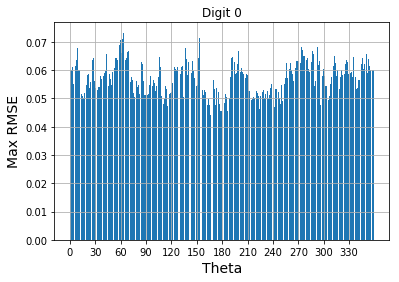

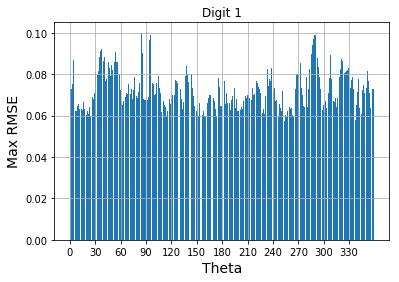

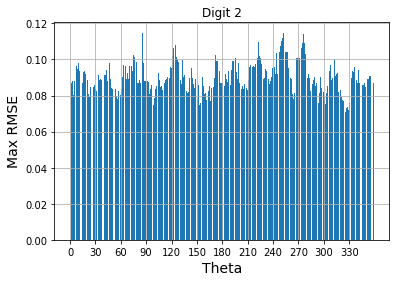

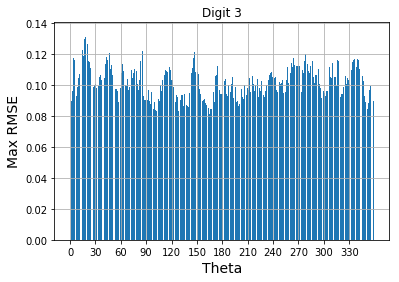

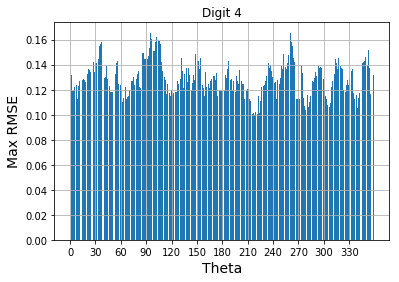

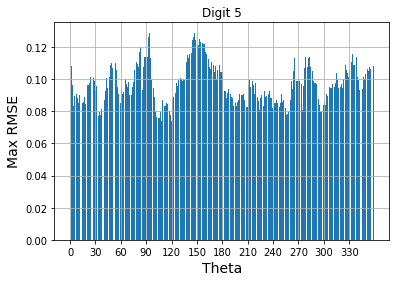

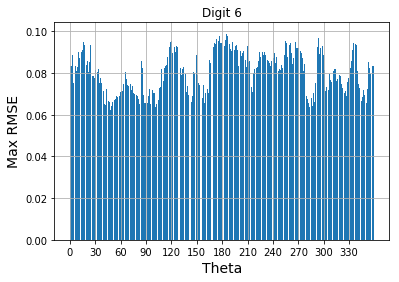

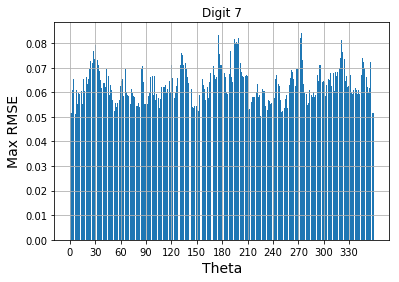

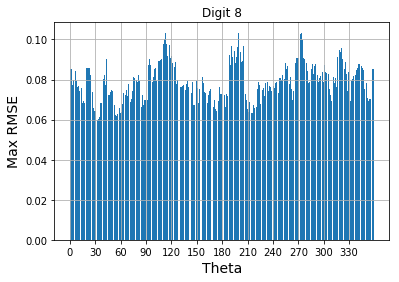

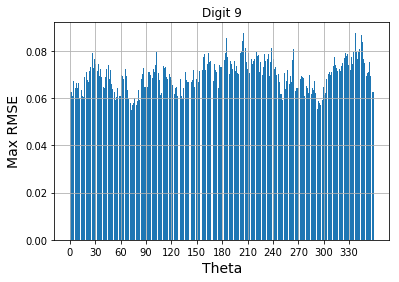

In [78]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(max_rmse_array[0].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, max_rmse_array[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
    plt.xlabel("Theta", fontsize=14)
    plt.ylabel("Max RMSE", fontsize=14)
#fig.tight_layout()
    plt.show()

#### bin width = 1.5 (default = 0.8)

<Figure size 864x576 with 0 Axes>

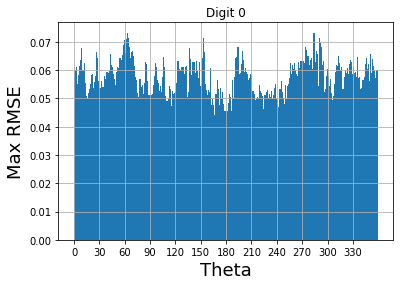

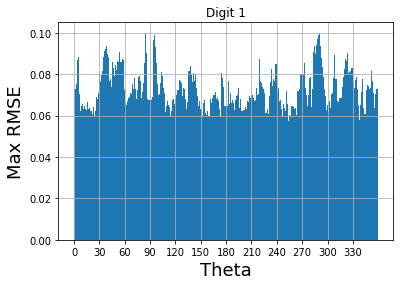

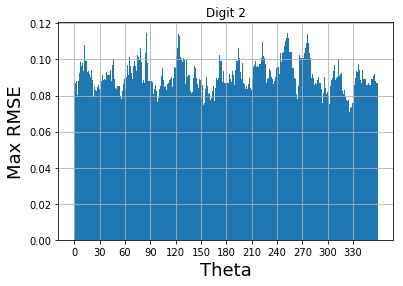

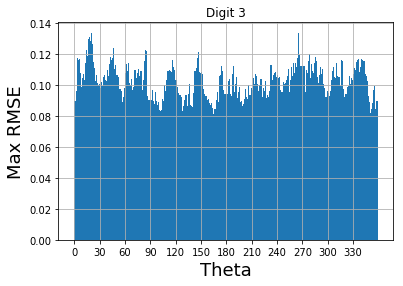

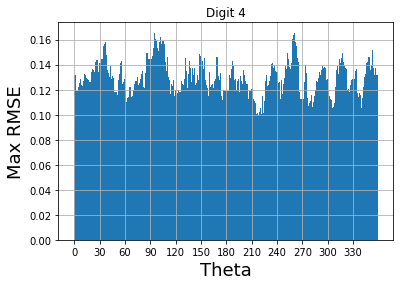

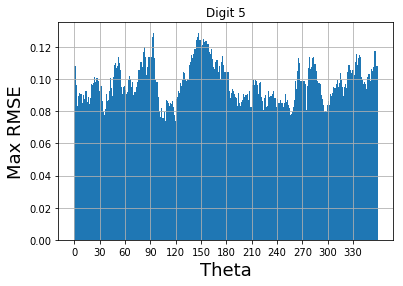

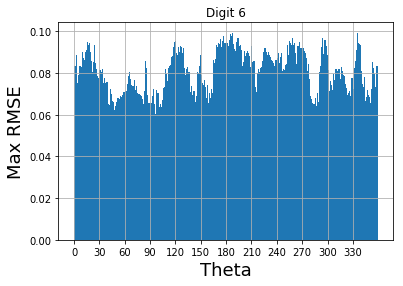

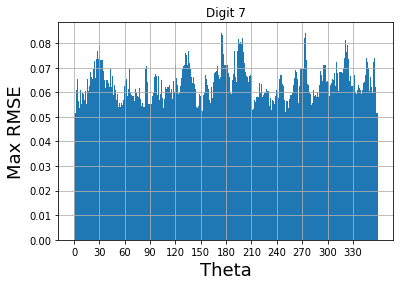

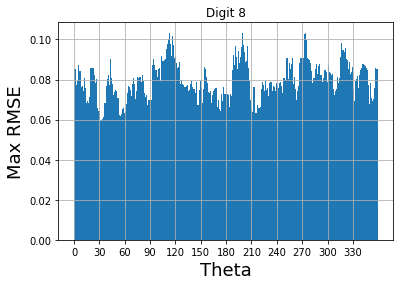

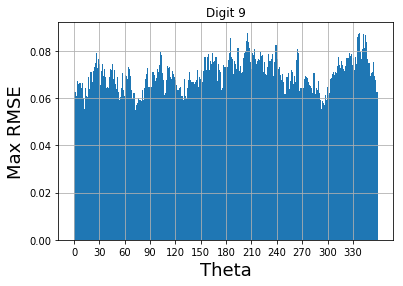

In [112]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(max_rmse_array[0].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, max_rmse_array[idx].ravel(),width=1.3)
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
    plt.xlabel("Theta", fontsize=18)
    plt.ylabel("Max RMSE", fontsize=18)
#fig.tight_layout()
    plt.show()

In [79]:
# save 1017 test result & digits imgs
np.savez('./maxrmse__imgs_1018', max_rmse=max_rmse_array, imgs=digit_imgs)

In [86]:
## max index in each digit-class
for idx, _rmses in enumerate(max_rmse_array):
    print(np.unravel_index(np.argmax(_rmses), _rmses.shape) )
    print("Digit {} max rmse {}".format(idx, np.max(_rmses)) )

(63,)
Digit 0 max rmse 0.07322224918337479
(85,)
Digit 1 max rmse 0.10007450426356419
(86,)
Digit 2 max rmse 0.11483356297263622
(20,)
Digit 3 max rmse 0.13397730500360694
(95,)
Digit 4 max rmse 0.1655146712621475
(94,)
Digit 5 max rmse 0.12900277665029053
(187,)
Digit 6 max rmse 0.09939661332234119
(175,)
Digit 7 max rmse 0.08426290835944623
(113,)
Digit 8 max rmse 0.10337210042725856
(205,)
Digit 9 max rmse 0.0877547687083832


In [88]:
#for digit,  rmse_table in enumerate(rmse_table_lists):
for digit, ix in enumerate(range(0,1,1,)):
    rmse_table = rmse_table_lists[ix]
    (idx, jdx) = np.unravel_index(np.argmax(rmse_table), rmse_table.shape)
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    rimgs_list = []
    for i in [idx, jdx]:
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    #print(rimgs.shape)
    encoded_imgs = encoder.predict(rimgs)
    decoded_imgs = decoder.predict(encoded_imgs)
    
    rimgs_list = []
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    encoded_imgs = encoder.predict(rimgs)
    all_decoded_imgs = decoder.predict(encoded_imgs)
    
    list_a = []
    list_b = []
    for i in  range(360):
        list_a.append(rmse_fn(decoded_imgs[0], all_decoded_imgs[i]))
        list_b.append(rmse_fn(decoded_imgs[1], all_decoded_imgs[i]))
    
    #print("diff {}".format(rmse_a - rmse_b))

In [89]:
len(list_a), len(list_b)

(360, 360)

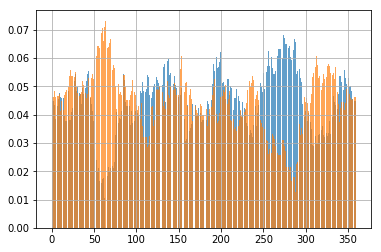

In [97]:
xs = [i for i in range(360)]
plt.bar(xs, list_a, alpha=0.7)
plt.bar(xs, list_b, alpha=0.7)
plt.grid(True)

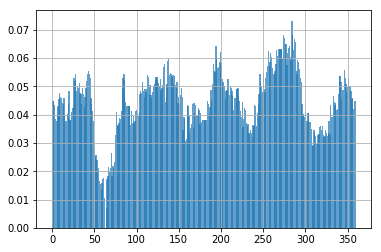

In [110]:
plt.bar(xs, list_a, alpha=0.7, width=1.5, linewidth=0.00001)
plt.grid(True)

In [99]:
np.max(list_a)

0.07322224918337479

In [93]:
np.max(list_a), np.max(list_b)

(0.07322224918337479, 0.07322224918337479)

In [95]:
np.argwhere(np.asarray(list_a) == np.max(list_a) ), np.argwhere(np.asarray(list_b) == np.max(list_b) )

(array([[284]]), array([[63]]))

RMSE on table

In [80]:
rmse_table_lists = []
for digit in range(10):
    rimgs_list = []
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    print(rimgs.shape)
    rmse_table_lists.append(compute_TableL2(rimgs, encoder, decoder))
    print(" NORMAL END:  Digit {} ".format(digit))

(360, 32, 32, 1)
 NORMAL END:  Digit 0 
(360, 32, 32, 1)
 NORMAL END:  Digit 1 
(360, 32, 32, 1)
 NORMAL END:  Digit 2 
(360, 32, 32, 1)
 NORMAL END:  Digit 3 
(360, 32, 32, 1)
 NORMAL END:  Digit 4 
(360, 32, 32, 1)
 NORMAL END:  Digit 5 
(360, 32, 32, 1)
 NORMAL END:  Digit 6 
(360, 32, 32, 1)
 NORMAL END:  Digit 7 
(360, 32, 32, 1)
 NORMAL END:  Digit 8 
(360, 32, 32, 1)
 NORMAL END:  Digit 9 


<Figure size 864x576 with 0 Axes>

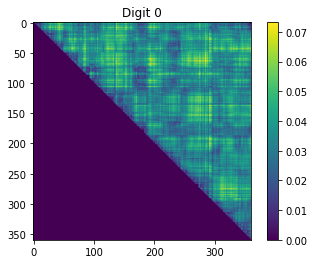

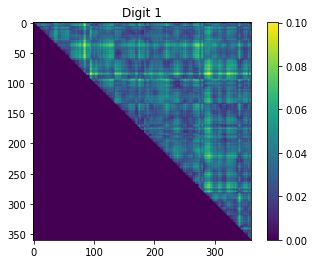

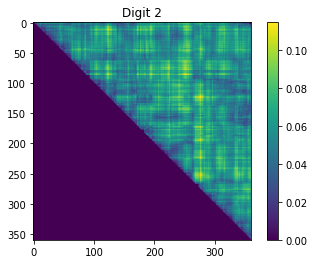

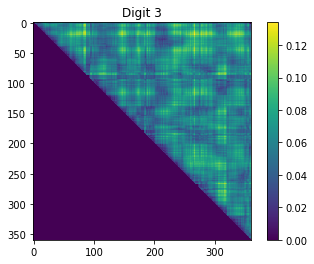

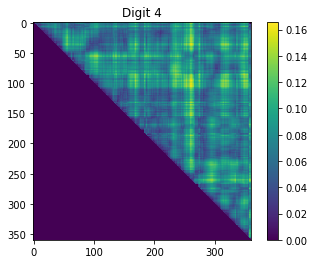

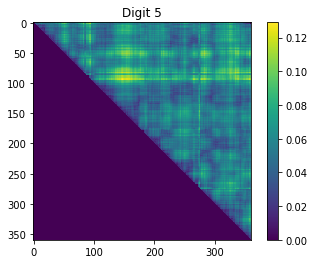

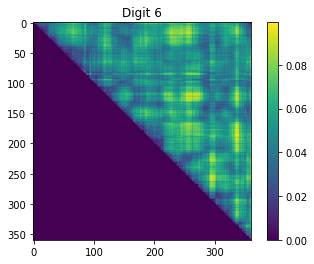

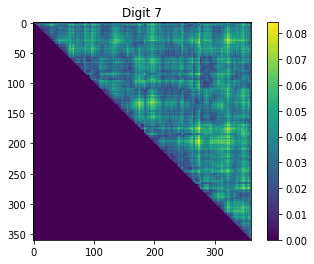

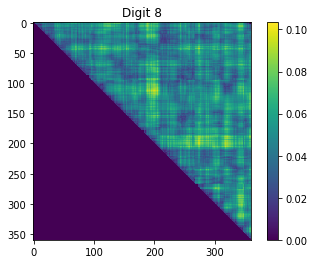

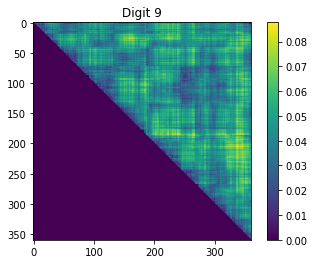

In [81]:
plt.figure(figsize=(12,8))
for idx, rmse_table in enumerate(rmse_table_lists):
    fig = plt.figure(figsize=(6,4))
    plt.imshow(rmse_table)
    plt.title("Digit {}".format(idx))
    #plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.colorbar()
    plt.show()

In [82]:
## max index in each digit-class
for idx, rmse_table in enumerate(rmse_table_lists):
    print(np.unravel_index(np.argmax(rmse_table), rmse_table.shape) )
    print("Digit {} max rmse {}".format(idx, np.max(rmse_table)) )

(63, 284)
Digit 0 max rmse 0.07322224918337479
(85, 291)
Digit 1 max rmse 0.10007450426356419
(86, 252)
Digit 2 max rmse 0.11483356297263622
(20, 266)
Digit 3 max rmse 0.13397730500360694
(95, 261)
Digit 4 max rmse 0.1655146712621475
(94, 147)
Digit 5 max rmse 0.12900277665029053
(187, 336)
Digit 6 max rmse 0.09939661332234119
(175, 274)
Digit 7 max rmse 0.08426290835944623
(113, 199)
Digit 8 max rmse 0.10337210042725856
(205, 338)
Digit 9 max rmse 0.0877547687083832


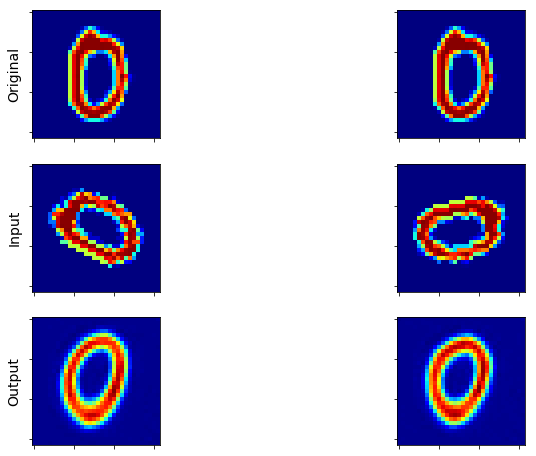

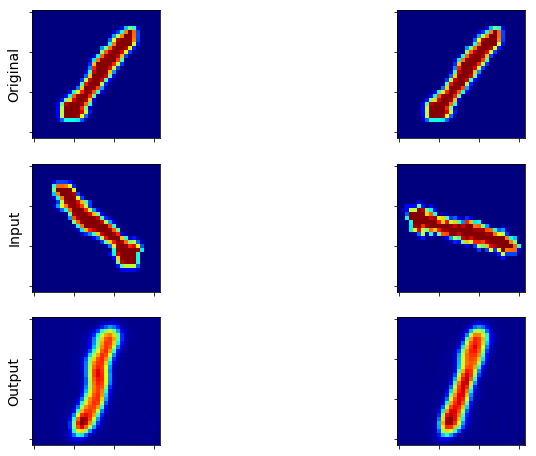

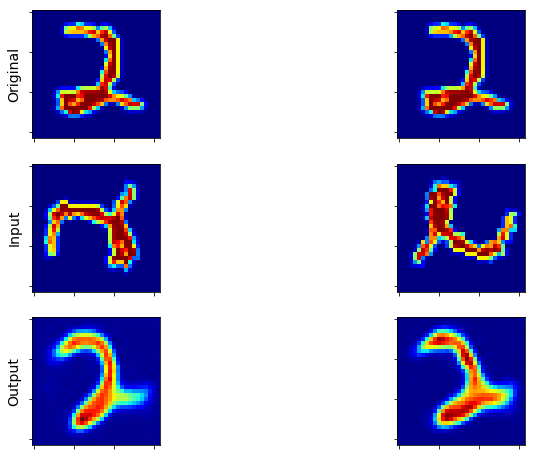

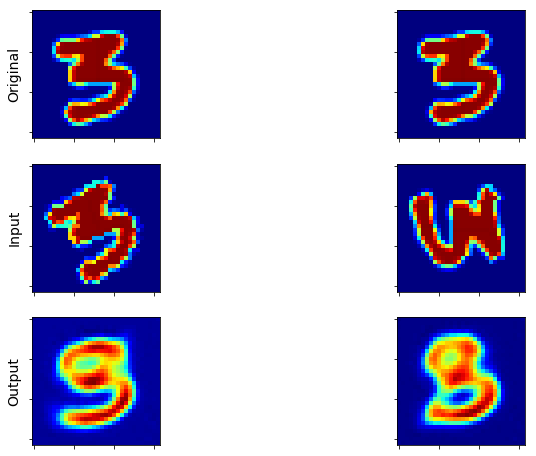

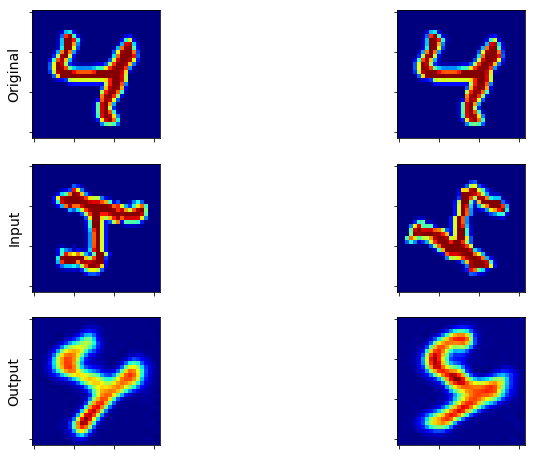

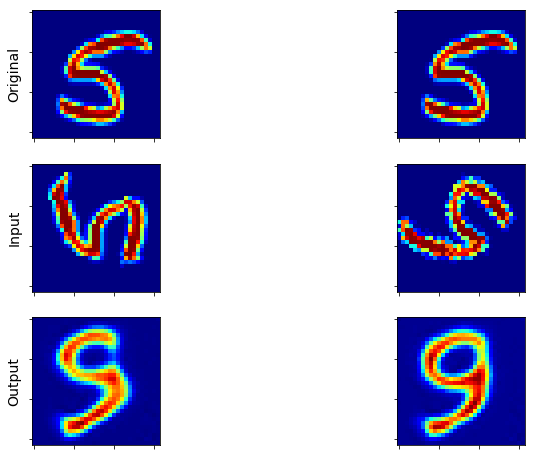

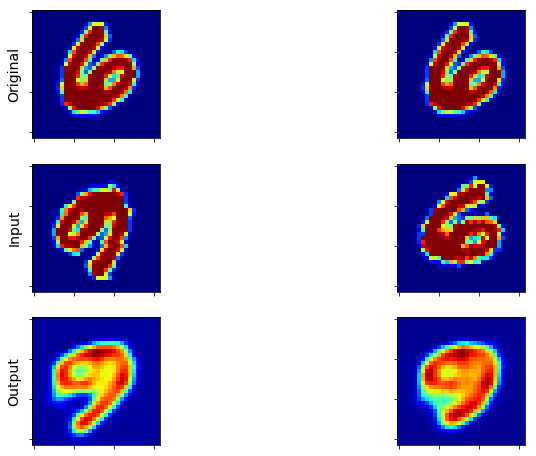

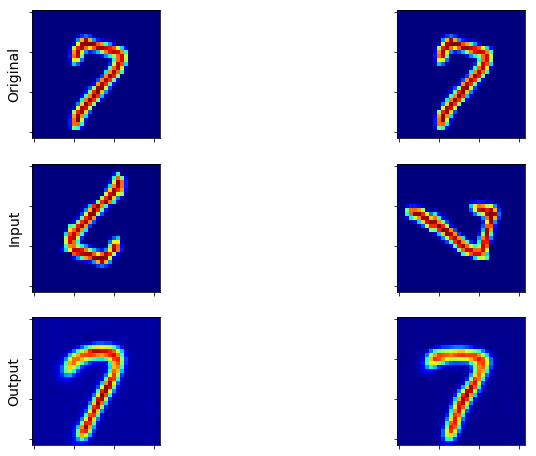

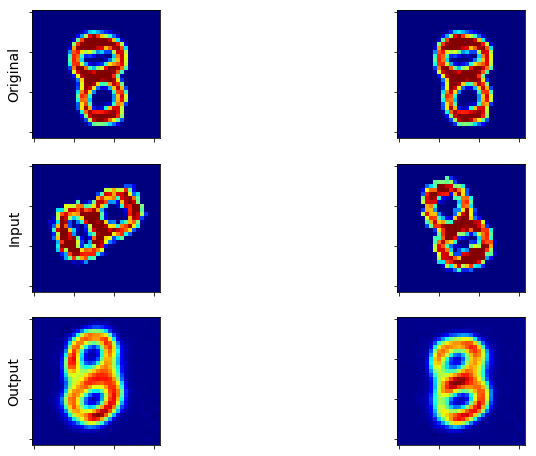

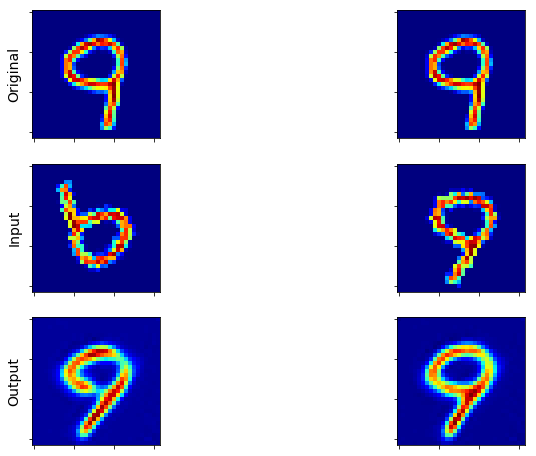

In [83]:
for digit,  rmse_table in enumerate(rmse_table_lists):
    (idx, jdx) = np.unravel_index(np.argmax(rmse_table), rmse_table.shape)
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    rimgs_list = []
    for i in [idx, jdx]:
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    #print(rimgs.shape)
    encoded_imgs = encoder.predict(rimgs)
    decoded_imgs = decoder.predict(encoded_imgs)
    n = decoded_imgs.shape[0]
    fig, ax = plt.subplots(3,n, figsize=(12,8))
    for j in range(n):
        ax[0][j].imshow(digit_imgs[digit].reshape(32,32), cmap='jet')
        ax[1][j].imshow(rimgs[j].reshape(32,32), cmap='jet')
        ax[2][j].imshow(decoded_imgs[j].reshape(32,32), cmap='jet')
        for k in range(3):
            ax[k][j].set_xticklabels([])
            ax[k][j].set_yticklabels([])
        if j == 0:
            ax[0][j].set_ylabel("Original", fontsize=18)
            ax[1][j].set_ylabel("Input", fontsize=18)
            ax[2][j].set_ylabel("Output", fontsize=18)
    plt.show()    
    plt.close()

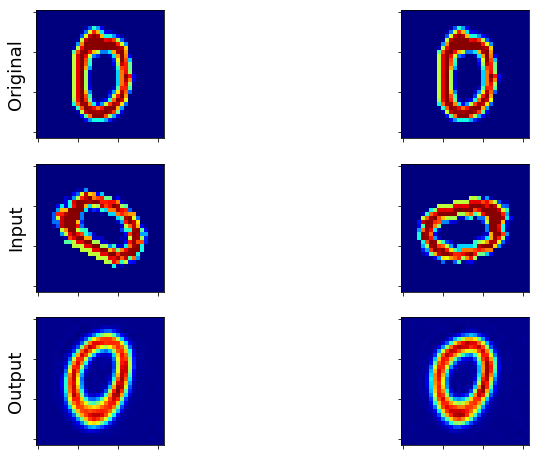

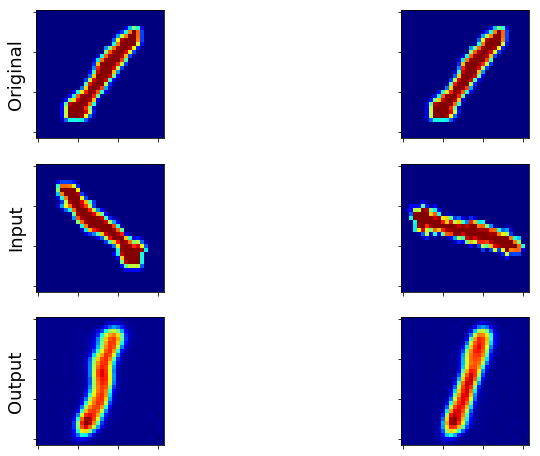

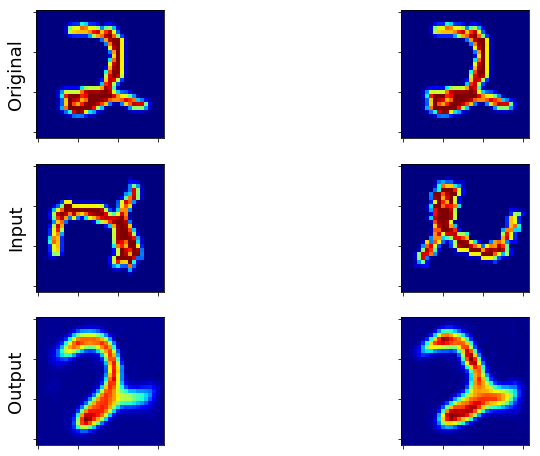

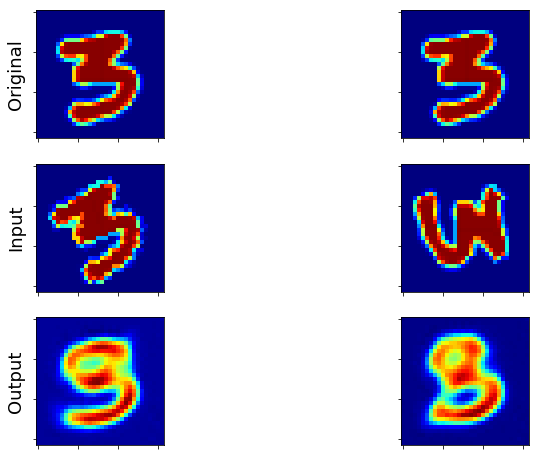

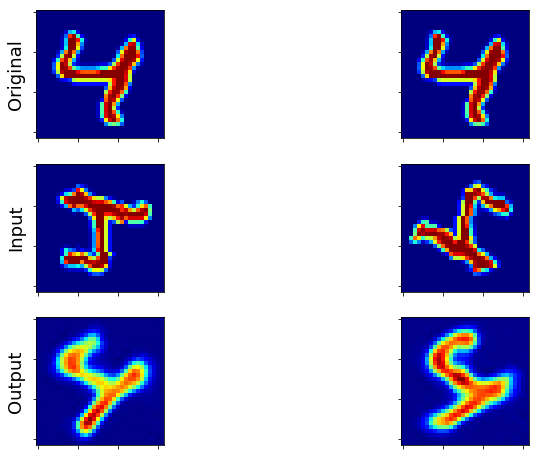

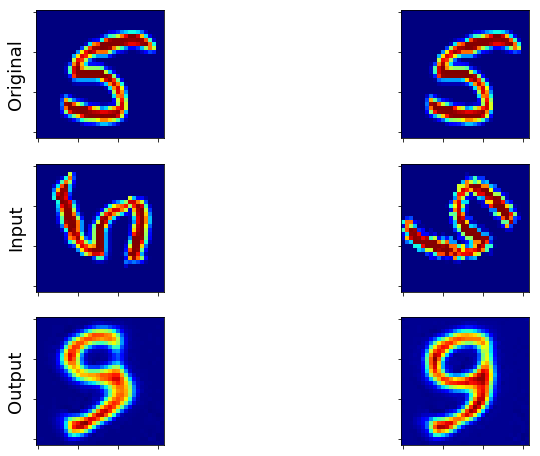

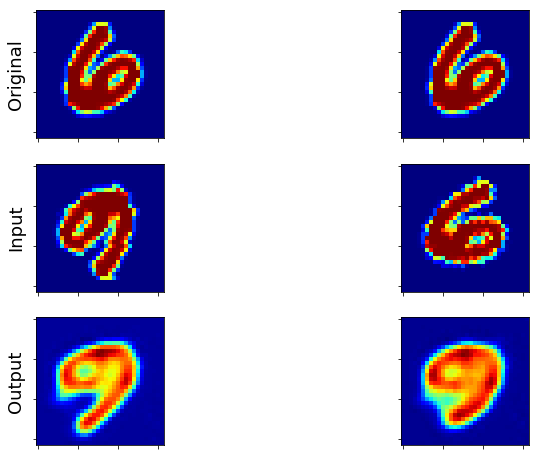

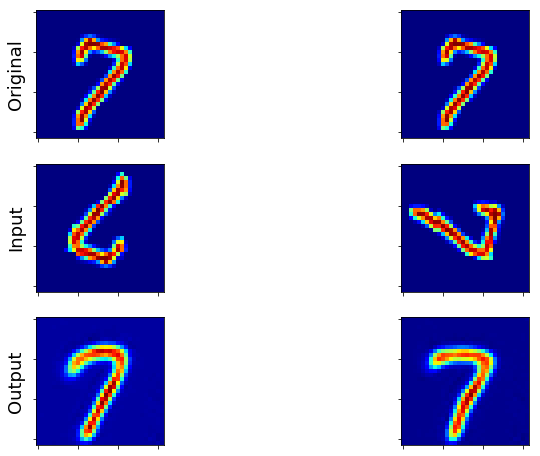

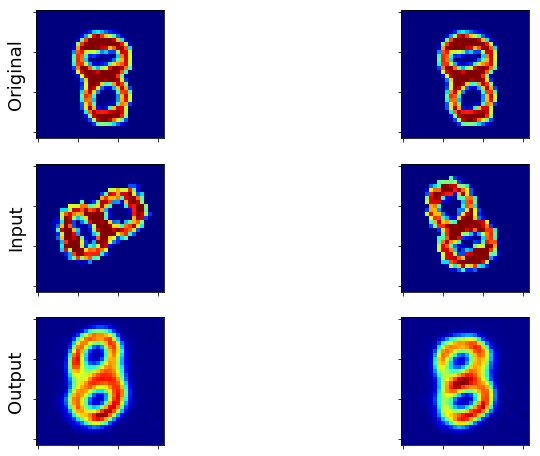

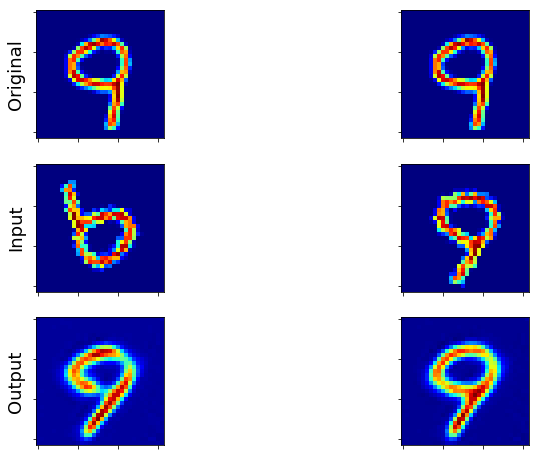

In [84]:
for digit,  rmse_table in enumerate(rmse_table_lists):
    (idx, jdx) = np.unravel_index(np.argmax(rmse_table), rmse_table.shape)
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    rimgs_list = []
    for i in [idx, jdx]:
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    #print(rimgs.shape)
    encoded_imgs = encoder.predict(rimgs)
    decoded_imgs = decoder.predict(encoded_imgs)
    n = decoded_imgs.shape[0]
    fig, ax = plt.subplots(3,n, figsize=(12,8))
    for j in range(n):
        ax[0][j].imshow(digit_imgs[digit].reshape(32,32), cmap='jet')
        ax[1][j].imshow(rimgs[j].reshape(32,32), cmap='jet')
        ax[2][j].imshow(decoded_imgs[j].reshape(32,32), cmap='jet')
        for k in range(3):
            ax[k][j].set_xticklabels([])
            ax[k][j].set_yticklabels([])
        if j == 0:
            ax[0][j].set_ylabel("Original", fontsize=18)
            ax[1][j].set_ylabel("Input", fontsize=18)
            ax[2][j].set_ylabel("Output", fontsize=18)
    plt.show()    
    plt.close()

---------------

------------------------
#### EXP 1

In [39]:
def rmse_fn(rimgs, encoder, decoder):
    encoded_imgs = encoder.predict(rimgs)
    decoded_imgs = decoder.predict(encoded_imgs)
    print(decoded_imgs.shape)
    rmses = []
    #x=decoded_imgs[0]
    for i in range(359):
        """errors in iteration when native array. probably no conmma
        """
        x = rimgs[i]
        y = decoded_imgs[i]
        res = np.asarray((x-y).ravel())
        _rmse = 0.00
        idx = 0
        for j in res:
            _rmse += j**2
            idx += 1
        rmses.append(np.sqrt(_rmse/float(idx)) )
    return np.asarray(rmses)

In [40]:
rmse_list = []
for digit in range(10):
    rimgs_list = []
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0))
    print(rimgs.shape)
    rmse_list.append(rmse_fn(rimgs, encoder, decoder))

(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)
(360, 32, 32, 1)


<Figure size 864x576 with 0 Axes>

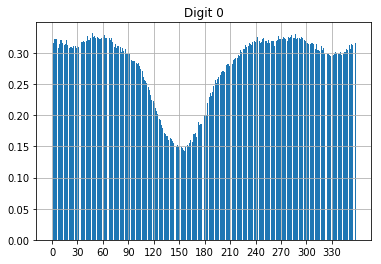

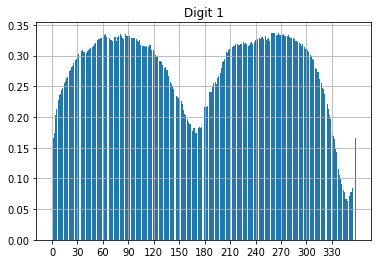

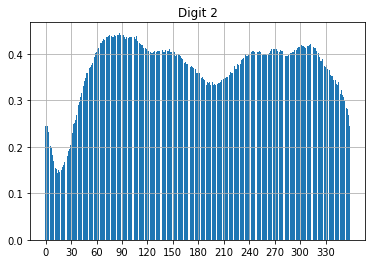

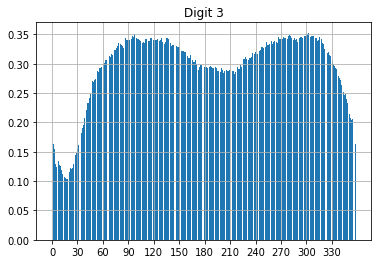

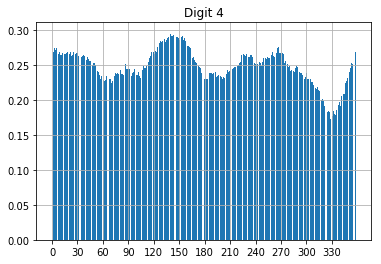

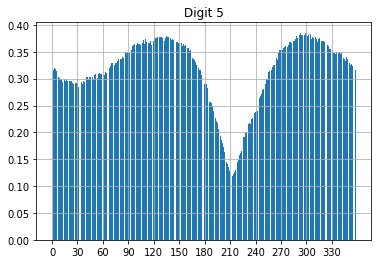

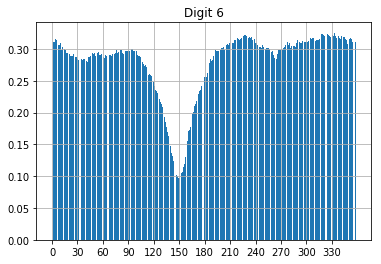

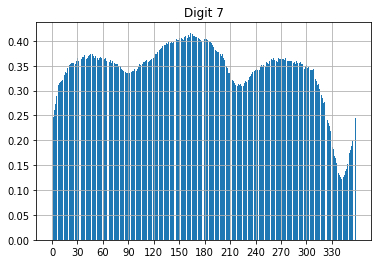

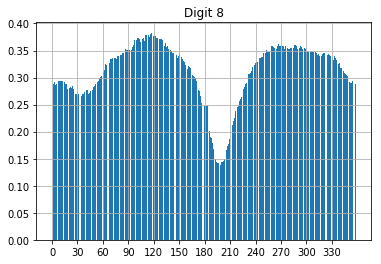

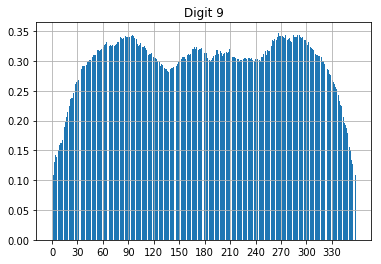

In [41]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(rmse_list[0].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, rmse_list[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
#fig.tight_layout()
    plt.show()